# Regresion de Edad y Género (Adivina quién)

Mariana Michell Flores Monroy

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Importamos las librerias necesarias (un montón)

In [2]:
import fastai as fai
import fastai.vision as fv
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import os
import numpy as np
import random
import gc
import PIL

from pathlib import Path
from torch.utils.data import Dataset
from torchvision import transforms, utils

En esta parte vamos a tomar el sexo y la edad y lo vamos a poner en arreglos aparte para después extraerlos.

In [3]:
def is_listy(x):
    return isinstance(x, (list, tuple))

class AgeSexItem(fv.ItemBase):
    def __init__(self, array):
        self.data = np.array(array).astype(np.float32)
    def __str__(self):
        L = ["Male", "Female"]
        return str(self.data[0]) + " / " + L[int(self.data[1] > 0.5)]

class AgeSexList(fv.ItemList):
    def __init__(self, items:fv.Iterator, **kwargs):
        super().__init__(np.array(items, dtype = np.float32), **kwargs)
        self.c = items.shape[1]
        
    def get(self, i):
        o = super().get(i)
        return AgeSexItem(o)
    
    def reconstruct(self, t):
        if is_listy(t):
            return AgeSexItem(np.array(t))
        return AgeSexItem(t.numpy())

Ahora extraemos la edad y el sexo

In [4]:
def extract_age_sex(filename):
    f = filename.stem.split("_")
    return float(f[0]), float(f[1])

In [5]:
#Cargamos los datos

def load_face_data(img_size, batch_size, amount = 1.0):
    transformaciones = fv.get_transforms(max_warp = 0.0)
    return (fv.ImageItemList.from_folder(path)
           .filter_by_rand(amount, seed = 666)
           .random_split_by_pct(0.1, seed = 666)
           .label_from_func(extract_age_sex, label_cls = AgeSexList)
           .transform(transformaciones, size = img_size)
           .databunch(bs = batch_size))

Estas lineas las usamos para caragr los datos al Cloud

In [ ]:
#!gs://redes_2/UTKFace.tar.gz /home/jupyter
#!gsutil -m cp gs://redes_2/UTKFace.tar.gz /home/jupyter

In [6]:
#!tar xzf UTKFace.tar.gz
#!ls UTKFace/

100_0_0_20170112213500903.jpg.chip.jpg	3_1_4_20161221192845405.jpg.chip.jpg
100_0_0_20170112215240346.jpg.chip.jpg	3_1_4_20161221192908158.jpg.chip.jpg
10_0_0_20161220222308131.jpg.chip.jpg	3_1_4_20161221192909421.jpg.chip.jpg
10_0_0_20170103200329407.jpg.chip.jpg	3_1_4_20161221193144389.jpg.chip.jpg
10_0_0_20170103200522151.jpg.chip.jpg	3_1_4_20161221193402694.jpg.chip.jpg
10_0_0_20170103233459275.jpg.chip.jpg	3_1_4_20161221193538039.jpg.chip.jpg
10_0_0_20170104013211746.jpg.chip.jpg	3_1_4_20161221195312639.jpg.chip.jpg
10_0_0_20170110215927291.jpg.chip.jpg	3_1_4_20161221201429017.jpg.chip.jpg
10_0_0_20170110220033115.jpg.chip.jpg	3_1_4_20161221201441793.jpg.chip.jpg
10_0_0_20170110220111082.jpg.chip.jpg	3_1_4_20161221202450265.jpg.chip.jpg
10_0_0_20170110220235233.jpg.chip.jpg	3_1_4_20161221202539569.jpg.chip.jpg
10_0_0_20170110220251986.jpg.chip.jpg	3_1_4_20161223231741788.jpg.chip.jpg
10_0_0_20170110220255346.jpg.chip.jpg	3_1_4_20170103205114064.jpg.chip.jpg
10_0_0_2017011022031629

20_1_0_20170104020855852.jpg.chip.jpg	37_1_1_20170116180008472.jpg.chip.jpg
20_1_0_20170104021334149.jpg.chip.jpg	37_1_1_20170116204841022.jpg.chip.jpg
20_1_0_20170105000707730.jpg.chip.jpg	37_1_1_20170116222809020.jpg.chip.jpg
20_1_0_20170105002441599.jpg.chip.jpg	37_1_1_20170116222816400.jpg.chip.jpg
20_1_0_20170105183447816.jpg.chip.jpg	37_1_1_20170116224921695.jpg.chip.jpg
20_1_0_20170105183449767.jpg.chip.jpg	37_1_1_20170116232758932.jpg.chip.jpg
20_1_0_20170105183741919.jpg.chip.jpg	37_1_1_20170117014034055.jpg.chip.jpg
20_1_0_20170105184054896.jpg.chip.jpg	37_1_1_20170117140024639.jpg.chip.jpg
20_1_0_20170109132033628.jpg.chip.jpg	37_1_1_20170117140121123.jpg.chip.jpg
20_1_0_20170109212842300.jpg.chip.jpg	37_1_1_20170117164315529.jpg.chip.jpg
20_1_0_20170109212911927.jpg.chip.jpg	37_1_1_20170117172409586.jpg.chip.jpg
20_1_0_20170109213016635.jpg.chip.jpg	37_1_2_20170104005945096.jpg.chip.jpg
20_1_0_20170109213411083.jpg.chip.jpg	37_1_2_20170105162546659.jpg.chip.jpg
20_1_0_20170

28_1_0_20170103180500095.jpg.chip.jpg	65_0_2_20170112224014771.jpg.chip.jpg
28_1_0_20170103180926608.jpg.chip.jpg	65_0_2_20170116233005621.jpg.chip.jpg
28_1_0_20170103181241664.jpg.chip.jpg	65_0_2_20170117000746182.jpg.chip.jpg
28_1_0_20170103181535329.jpg.chip.jpg	65_0_2_20170117191803139.jpg.chip.jpg
28_1_0_20170103181722585.jpg.chip.jpg	65_0_2_20170119205814303.jpg.chip.jpg
28_1_0_20170103182217768.jpg.chip.jpg	65_0_2_20170120223049075.jpg.chip.jpg
28_1_0_20170103182242233.jpg.chip.jpg	65_0_3_20161220221926818.jpg.chip.jpg
28_1_0_20170103182305562.jpg.chip.jpg	65_0_3_20170104215624533.jpg.chip.jpg
28_1_0_20170103182323771.jpg.chip.jpg	65_0_3_20170105180657742.jpg.chip.jpg
28_1_0_20170103183935666.jpg.chip.jpg	65_0_3_20170109143021566.jpg.chip.jpg
28_1_0_20170104021158812.jpg.chip.jpg	65_0_3_20170112222321514.jpg.chip.jpg
28_1_0_20170104165123368.jpg.chip.jpg	65_0_3_20170117143046787.jpg.chip.jpg
28_1_0_20170104165233241.jpg.chip.jpg	65_0_3_20170117161025414.jpg.chip.jpg
28_1_0_20170

Y hacemos el mismo procedimiento de siempre...

In [7]:
path = Path("UTKFace")

In [8]:
datos = load_face_data(192, 64, amount = 0.2)

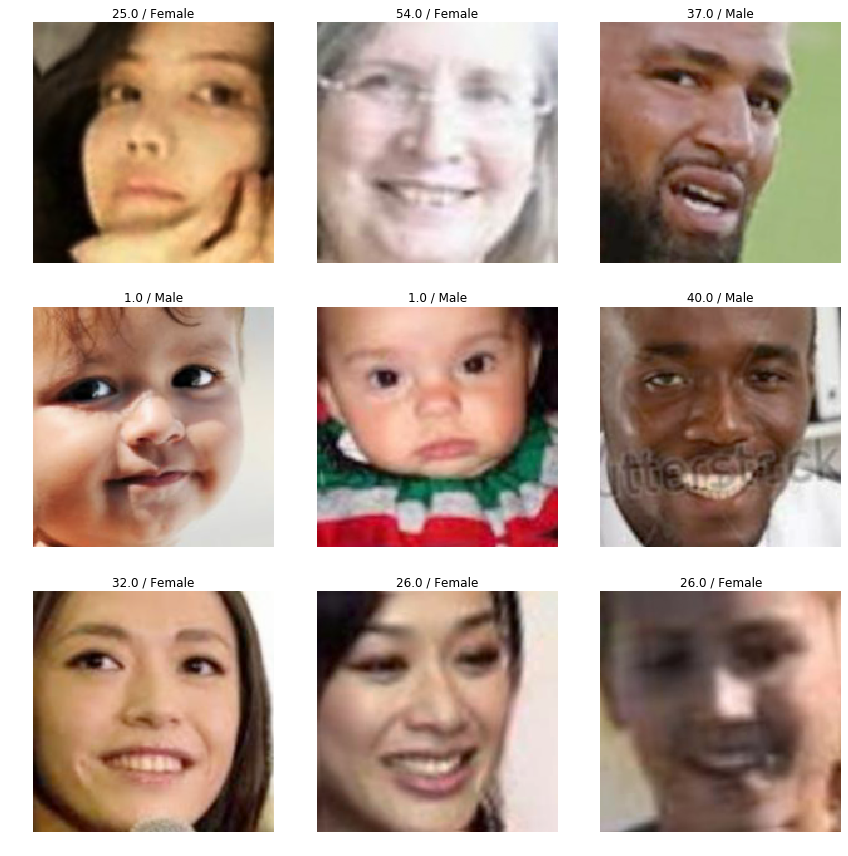

In [9]:
datos.show_batch(rows = 3)

In [10]:
!ls {path} | head

100_0_0_20170112213500903.jpg.chip.jpg
100_0_0_20170112215240346.jpg.chip.jpg
10_0_0_20161220222308131.jpg.chip.jpg
10_0_0_20170103200329407.jpg.chip.jpg
10_0_0_20170103200522151.jpg.chip.jpg
10_0_0_20170103233459275.jpg.chip.jpg
10_0_0_20170104013211746.jpg.chip.jpg
10_0_0_20170110215927291.jpg.chip.jpg
10_0_0_20170110220033115.jpg.chip.jpg
10_0_0_20170110220111082.jpg.chip.jpg
ls: write error: Broken pipe


# Hora de crear el modelo

Como este modelo tiene que hacer regresión y no clasificación, no podemos usar el "create_cnn". Así que tenemos que hacer otras cositas a mano, de acuerdo a lo que queremos lograr.

In [11]:
class SexAgeModel(nn.Module):
    def __init__(self, filters, p = 0.33):
        super().__init__()
        ni = filters[0]
        layers = list(fv.models.resnet34(pretrained = True).children())[:-2]
        layers += [fv.AdaptiveConcatPool2d(), fv.Flatten()]
        
        for ni, no in zip(filters[:-1], filters[1:]):
            layers += [nn.LeakyReLU(),
                      nn.BatchNorm1d(ni),
                      nn.Dropout(p),
                      nn.Linear(ni, no)]
        self.net = nn.Sequential(*layers)
        
    def forward(self, x):
        a = torch.sigmoid(self.net(x))
        a.squeeze()
        a_age = (a[:,0]*117).unsqueeze(1) #Son las 117 edades del dataset
        a_sex = a[:,1].unsqueeze(1)
        return torch.cat([a_age, a_sex], dim = 1)


In [12]:
modelo = SexAgeModel([1024, 512, 16, 2])

In [13]:
learner = fv.Learner(datos, modelo, wd = 0.1, loss_func = F.mse_loss)

Como esta vez hicimos una red a manita, no se sabe cuales partes son las que se debe entrenar y cuales no. Para esto tenemos que hacer divisiones en ella.

In [14]:
learner.split([modelo.net[3], modelo.net[6], modelo.net[8]])

In [15]:
learner.layer_groups[3]

Sequential(
  (0): AdaptiveAvgPool2d(output_size=1)
  (1): AdaptiveMaxPool2d(output_size=1)
  (2): Flatten()
  (3): LeakyReLU(negative_slope=0.01)
  (4): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): Dropout(p=0.33)
  (6): Linear(in_features=1024, out_features=512, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): Dropout(p=0.33)
  (10): Linear(in_features=512, out_features=16, bias=True)
  (11): LeakyReLU(negative_slope=0.01)
  (12): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (13): Dropout(p=0.33)
  (14): Linear(in_features=16, out_features=2, bias=True)
)

In [16]:
learner.freeze_to(-1)

# Y empezamos a entrenar

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


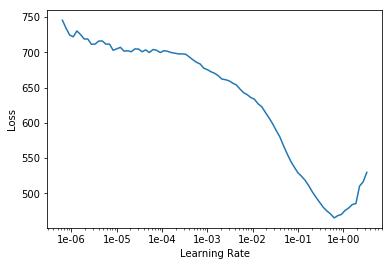

In [17]:
learner.lr_find(); learner.recorder.plot()

In [18]:
learner.fit_one_cycle(3, 1e-1)

epoch,train_loss,valid_loss
1,169.283447,216.369995
2,109.069405,247.275116
3,77.260574,48.287491


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


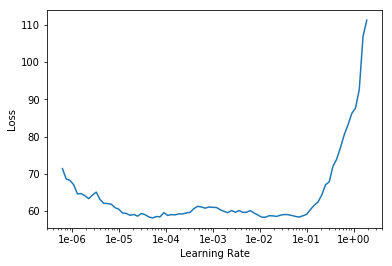

In [19]:
learner.lr_find(); learner.recorder.plot()

In [20]:
learner.fit_one_cycle(6, 2e-2)

epoch,train_loss,valid_loss
1,59.893555,47.585300
2,63.593098,180.453720
3,61.530144,75.197418
4,58.469845,47.279202
5,53.552647,41.491112
6,49.341587,36.930050


In [21]:
learner.save("stage1") #Salvamos

In [22]:
learner.load("stage1"); #Cargamos el modelo
gc.collect();

## ¡A entrenar las últimas capas!

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


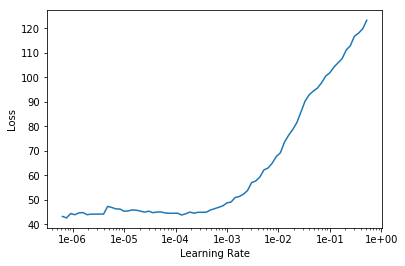

In [23]:
learner.unfreeze()
learner.lr_find(); learner.recorder.plot()

In [24]:
learner.fit_one_cycle(3, max_lr = slice(1e-5, 1e-4))

epoch,train_loss,valid_loss
1,45.011280,38.000320
2,43.798344,34.530594
3,41.877403,32.896225


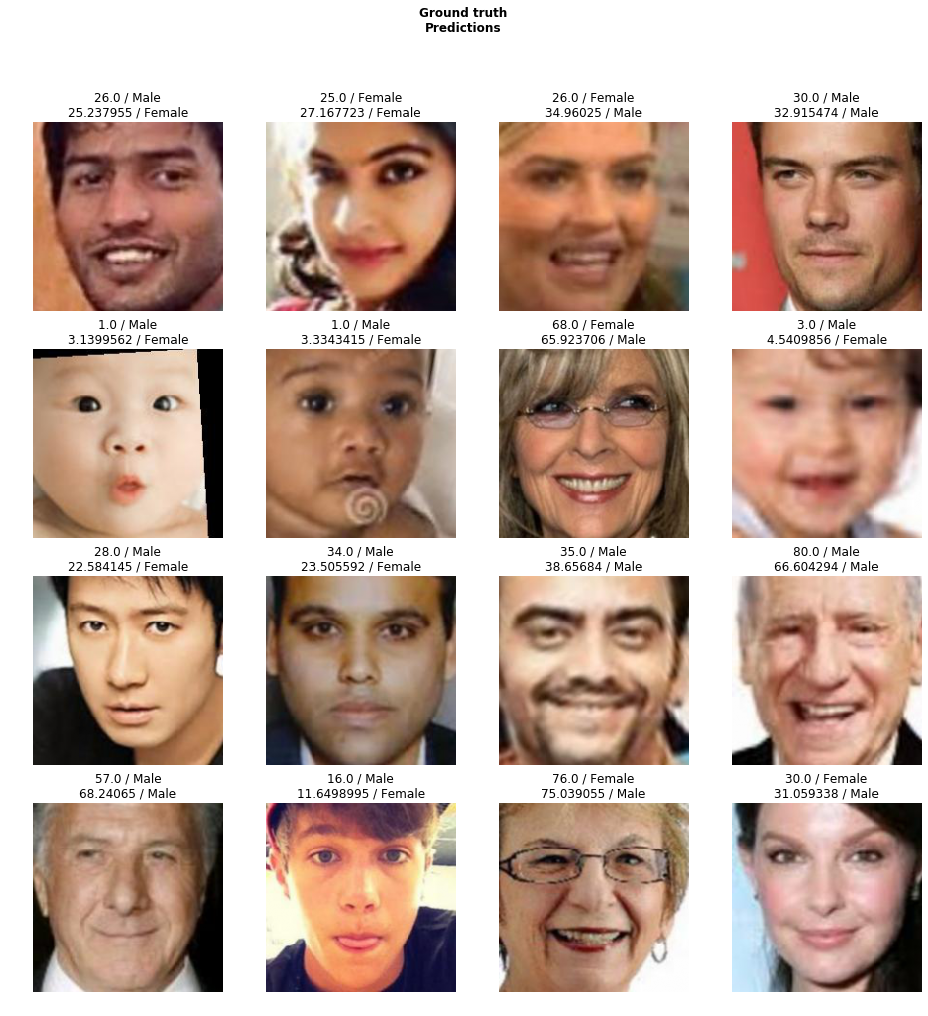

In [25]:
learner.show_results(rows = 4)

In [26]:
learner.save("stage2") #Volvemos a salvar

# Creando función de error

In [33]:
def edad_loss(pred, targ):
    p = ((pred)**0.5)/2
    t = ((targ)**0.5)/2
    return F.l1_loss(p, t)

In [34]:
def compara(a, b): 
    return edad_loss(torch.tensor(float(a)), torch.tensor(float(b))).item()

In [35]:
compara(2,3), compara(15,18), compara(40,46), compara(60, 68), compara(90, 100), compara(65, 70)

(0.1589186191558838,
 0.184828519821167,
 0.22888731956481934,
 0.2501220703125,
 0.25658369064331055,
 0.15217113494873047)

Le decimos al learner cuál es la función que queremos utilizar

In [36]:
learner.loss_func = edad_loss

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


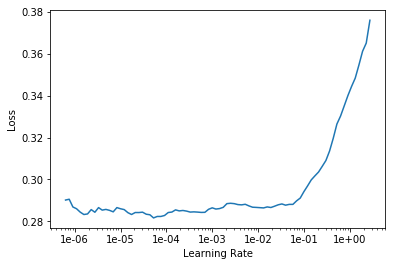

In [37]:
learner.freeze()
learner.lr_find();learner.recorder.plot()

In [38]:
learner.fit_one_cycle(4, 2e-3)

epoch,train_loss,valid_loss
1,0.287462,0.285863
2,0.286294,0.260542
3,0.282390,0.259313
4,0.276185,0.259205


In [39]:
learner.save("stage1-with-lossf") #Salvamos (otra vez)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


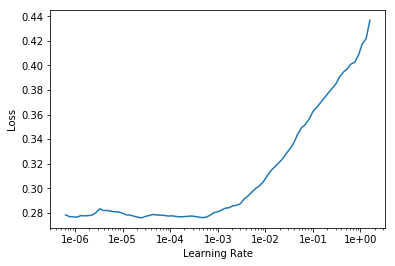

In [40]:
learner.unfreeze()
learner.lr_find(); learner.recorder.plot()

In [41]:
learner.fit_one_cycle(4, slice(1e-5, 1e-4))

epoch,train_loss,valid_loss
1,0.274706,0.265505
2,0.276962,0.259330
3,0.272227,0.253892
4,0.267994,0.252368


In [42]:
learner.save("stage2-with-lossf") #Volvemos a salvar

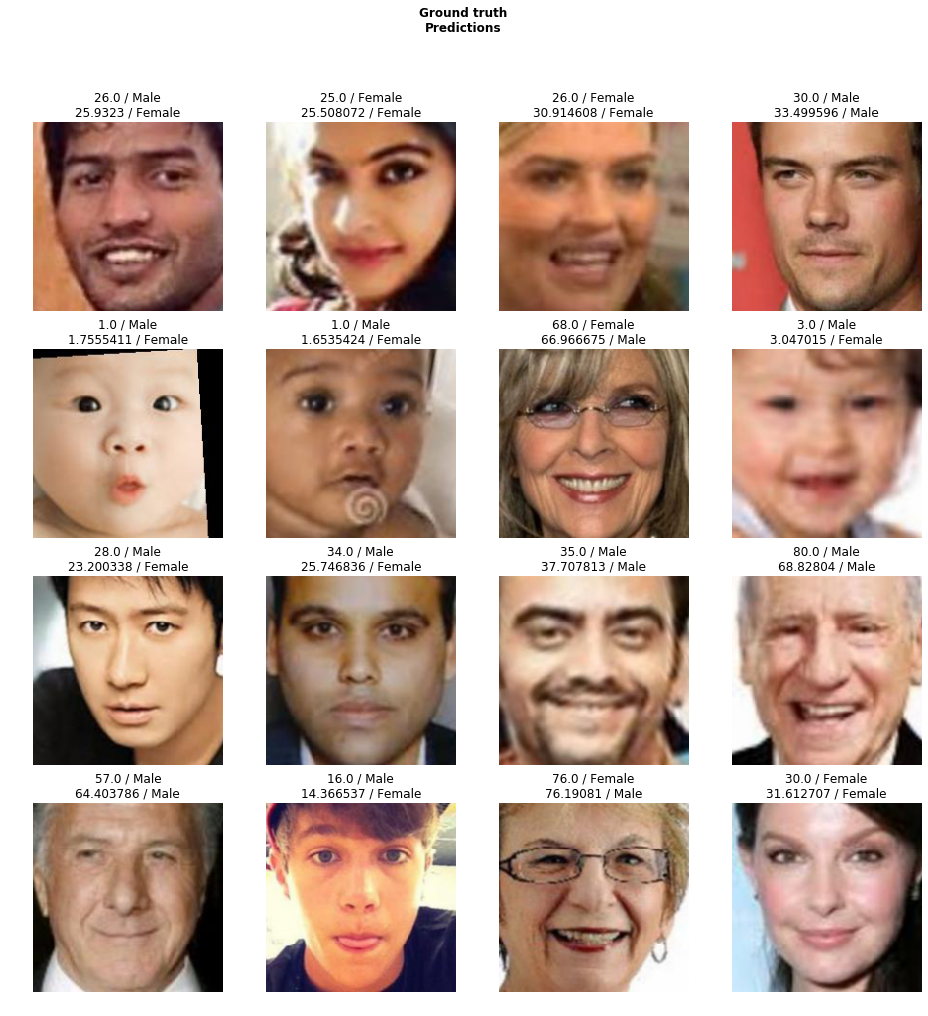

In [43]:
learner.show_results(rows = 4)

# Conclusiones

En resumen, hacer regresión lineal de varias etiquetas es algo complicado que aún no termino de dominar. Ahora bien, las funciones de error son importantes, ya que con ellas la red neuronal va corrigiendo sus errores.

Y en el caso de regresión lineal es aún más importante porque el margen de error es más grande, y es mega importante que la red corrija sus errores.